###Importing Package

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

##### Importing CSV

In [52]:
df=pd.read_csv('https://raw.githubusercontent.com/shivsurya-s/Dataset/main/train-chennai-sale.csv')

In [53]:
df.head(2)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770


In [54]:
df.shape

(7109, 22)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [56]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [57]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [58]:
df.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [59]:
df=df.fillna({"N_BEDROOM":df["N_BEDROOM"].mode()[0],"N_BATHROOM":df["N_BATHROOM"].mode()[0],"QS_OVERALL":df["QS_OVERALL"].mean()})

In [60]:
df["AREA"].value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [61]:
area={"Chrompt":"Chrompet","Chrmpet":"Chrompet","Chormpet":"Chrompet","Karapakam":"Karapakkam","KKNagar":"KK Nagar","Velchery":"Velachery","Ana Nagar":"Anna Nagar","Ann Nagar":"Anna Nagar","Adyr":"Adyar","TNagar":"T Nagar"}
df.AREA=df.AREA.replace(area)

In [62]:
df["DATE_SALE"]=pd.to_datetime(df["DATE_SALE"])

In [63]:
df["N_BEDROOM"]=df["N_BEDROOM"].astype("int64")
df["N_BATHROOM"]=df["N_BATHROOM"].astype("int64")

In [64]:
df["SALE_COND"].value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [65]:
sale_cond={"Adj Land":"AdjLand","Partiall":"Partial","PartiaLl":"Partial","Ab Normal":"AbNormal"}
df.SALE_COND=df.SALE_COND.replace(sale_cond)

In [66]:
park_facil={"Noo":"No"}
df.PARK_FACIL=df.PARK_FACIL.replace(park_facil)

In [67]:
df["DATE_BUILD"]=pd.to_datetime(df["DATE_BUILD"])

In [68]:
df["BUILDTYPE"].value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [69]:
buildtype={"Comercial":"Commercial","Other":"Others"}
df.BUILDTYPE=df.BUILDTYPE.replace(buildtype)

In [70]:
df["UTILITY_AVAIL"].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [71]:
utility={"All Pub":"AllPub","NoSeWa":"NoSewr","NoSewr ":"NoSewr"}
df["UTILITY_AVAIL"]=df["UTILITY_AVAIL"].replace(utility)

In [72]:
df["STREET"].value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [73]:
street={"Pavd":"Paved","NoAccess":"No Access"}
df.STREET=df.STREET.replace(street)

In [74]:
df["AGE"]=(df["DATE_SALE"]- df["DATE_BUILD"]).astype('timedelta64[Y]').astype('int')

In [75]:
df["SALES_PRICE"]=df["REG_FEE"]+df["COMMIS"]+df["SALES_PRICE"]

In [76]:
df['YEAR_BUILD'] = df['DATE_BUILD'].dt.year
df['YEAR_SALE'] = df['DATE_SALE'].dt.year

###Exploratory Data Analysis

Column Wise Distribution

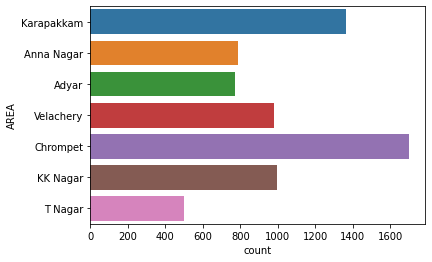

In [77]:
area=sns.countplot(y=df.AREA)

Most of the houses are in Chrompet and least is in T Nagar

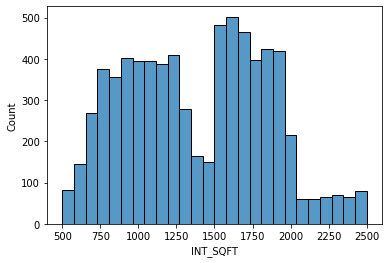

In [78]:
sqft=sns.histplot(x=df["INT_SQFT"])

Almost 500 houses are in 1600Sqft and around 50 houses are in 2150Sqft

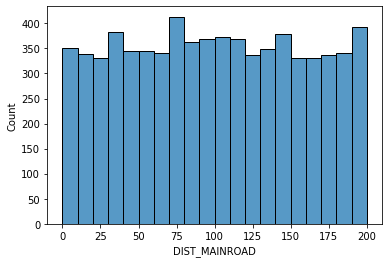

In [79]:
main_road=sns.histplot(x=df["DIST_MAINROAD"])

Around 400 houses are 75m are away from the main road.

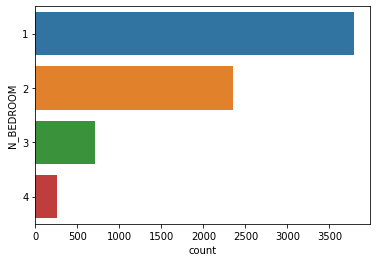

In [80]:
bedroom=sns.countplot(y=df.N_BEDROOM)

Most houses have only 1 Bedroom

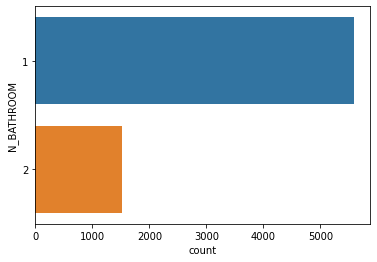

In [81]:
bathroom=sns.countplot(y=df.N_BATHROOM)

Most of houses have only 1 bathroom

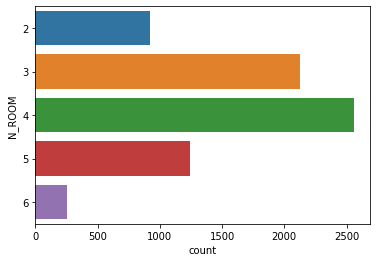

In [82]:
rooms=sns.countplot(y=df.N_ROOM)

Around 2500 houses are having 4 rooms in total

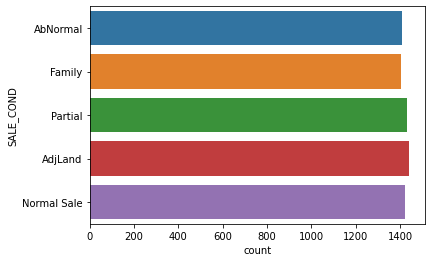

In [83]:
sale_cond=sns.countplot(y=df.SALE_COND)

Around 1450 houses are in AdjLand Condition

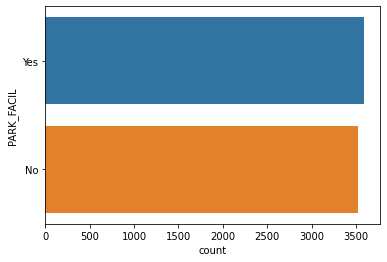

In [84]:
park_facil=sns.countplot(y=df.PARK_FACIL)

3500+ houses are with parking facility

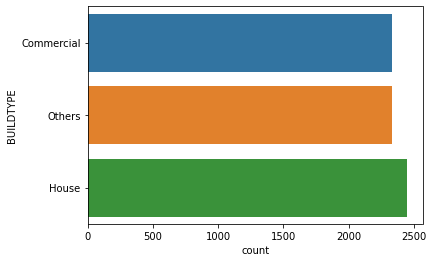

In [85]:
buildtype=sns.countplot(y=df.BUILDTYPE)

Most of the building are houses

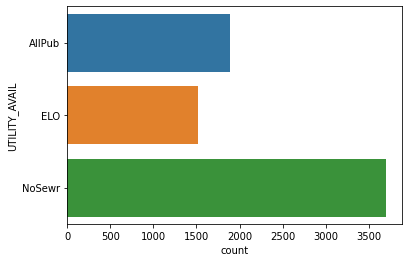

In [86]:
utility_availability=sns.countplot(y=df.UTILITY_AVAIL)

Most houses doesn't have NoSewr

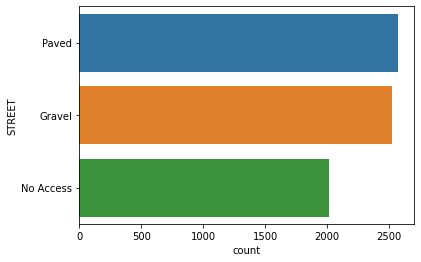

In [87]:
streets=sns.countplot(y=df.STREET)

Most houses are with Paved Street

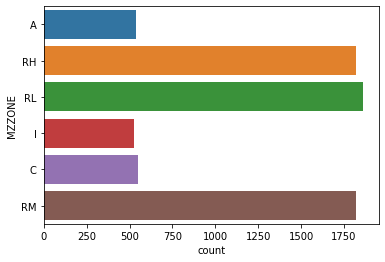

In [88]:
mzzone=sns.countplot(y=df.MZZONE)

Around 1800 houses are in RL Zone

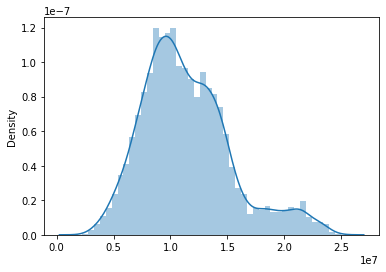

In [89]:
sale_price=sns.distplot(x=df.SALES_PRICE)

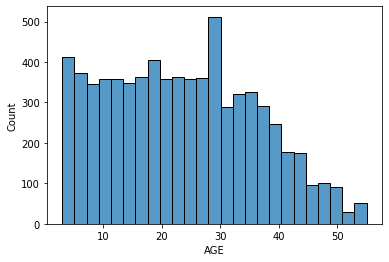

In [90]:
age=sns.histplot(df.AGE)

Around 500 houses are 27-30 years old

###Distribution of Feature vs Target Column

In [91]:
x=pd.DataFrame(df.groupby("AREA")["SALES_PRICE"].mean())
y=df["AREA"].unique()
y=sorted(y)

data={"AREA":y,"Avg_price":x["SALES_PRICE"]}
temp=pd.DataFrame(data)
temp.sort_values("Avg_price",inplace=True)


fig=px.bar(temp,x="AREA",y="Avg_price",title="AREA vs Avg.SALES_PRICE")
fig

From the graph, we can predict that Karapakkam has least price when compared to other area.The graph shows linear relationship so it is essential feature

In [92]:
fig=px.scatter(x=df.INT_SQFT,y=df.SALES_PRICE,color=df.INT_SQFT)
fig

From the graph,we can predict the price for the SQFT . As the sqft increase price increases.
The graph shows linear relationship and it is essential feature

In [93]:
fig=px.scatter(x=df.DIST_MAINROAD,y=df.SALES_PRICE,color=df.DIST_MAINROAD)
fig

From the graph, we can predict that there is no linear relationship and it is not an essential feature

In [94]:
x=pd.DataFrame(df.groupby("N_BEDROOM")["SALES_PRICE"].mean())
y=df["N_BEDROOM"].unique()
y=sorted(y)

data={"N_BEDROOM":y,"Avg_price":x["SALES_PRICE"]}
temp=pd.DataFrame(data)
temp.sort_values("Avg_price",inplace=True)
fig=px.bar(temp,x="N_BEDROOM",y="Avg_price")
fig

From the graph, we can predict that as no.o.of room increase the price also increases. The graph shows linear relationship and it is an essential feature

In [95]:
x=pd.DataFrame(df.groupby("N_BATHROOM")["SALES_PRICE"].mean())
y=df["N_BATHROOM"].unique()
y=sorted(y)

data={"N_BATHROOM":y,"Avg_price":x["SALES_PRICE"]}
temp=pd.DataFrame(data)
temp.sort_values("Avg_price",inplace=True)

fig=px.bar(x=temp.N_BATHROOM,y=temp.Avg_price)
fig

The graph shows linear relationship and it is an essential feature

In [96]:
x=pd.DataFrame(df.groupby("N_ROOM")["SALES_PRICE"].mean())
y=df["N_ROOM"].unique()
y=sorted(y)

data={"N_ROOM":y,"Avg_price":x["SALES_PRICE"]}
temp=pd.DataFrame(data)
temp.sort_values("Avg_price",inplace=True)

fig=px.bar(x=temp.N_ROOM,y=temp.Avg_price)
fig

From the graph , we can predict that as the total no.of.rooms increases the price also increases. The graph shows linear relationship and it is an essential feature

In [97]:
x=pd.DataFrame(df.groupby("SALE_COND")["SALES_PRICE"].mean())
y=df["SALE_COND"].unique()
y=sorted(y)

data={"SALE_COND":y,"Avg_price":x["SALES_PRICE"]}
temp=pd.DataFrame(data)
temp.sort_values("Avg_price",inplace=True)

fig=px.bar(x=temp.SALE_COND,y=temp.Avg_price)
fig

From the graph, we can predict that houses in AdjLand Condition has high in price and the graph shows linear relationship so it is an essential feature

In [98]:
x=pd.DataFrame(df.groupby("PARK_FACIL")["SALES_PRICE"].mean())
y=df["PARK_FACIL"].unique()
y=sorted(y)

data={"PARK_FACIL":y,"Avg_price":x["SALES_PRICE"]}
temp=pd.DataFrame(data)
temp.sort_values("Avg_price",inplace=True)

fig=px.bar(x=temp.PARK_FACIL,y=temp.Avg_price)
fig

From the graph, houses with parking facility are high in price. The graph shows linear relationship and it is an essential feature

In [99]:
x=pd.DataFrame(df.groupby("BUILDTYPE")["SALES_PRICE"].mean())
y=df["BUILDTYPE"].unique()
y=sorted(y)

data={"BUILDTYPE":y,"Avg_price":x["SALES_PRICE"]}
temp=pd.DataFrame(data)
temp.sort_values("Avg_price",inplace=True)

fig=px.bar(x=temp.BUILDTYPE,y=temp.Avg_price)
fig

From the graph, it is clear that it's an essential feature

In [100]:
x=pd.DataFrame(df.groupby("UTILITY_AVAIL")["SALES_PRICE"].mean())
y=df["UTILITY_AVAIL"].unique()
y=sorted(y)

data={"UTILITY_AVAIL":y,"Avg_price":x["SALES_PRICE"]}
temp=pd.DataFrame(data)
temp.sort_values("Avg_price",inplace=True)

fig=px.bar(x=temp.UTILITY_AVAIL,y=temp.Avg_price)
fig

In [101]:
x=pd.DataFrame(df.groupby("STREET")["SALES_PRICE"].mean())
y=df["STREET"].unique()
y=sorted(y)

data={"STREET":y,"Avg_price":x["SALES_PRICE"]}
temp=pd.DataFrame(data)
temp.sort_values("Avg_price",inplace=True)

fig=px.bar(x=temp.STREET,y=temp.Avg_price)
fig

Here , houses with gravel Street costs high in price. It has linear relationship and it is an essential feature

In [102]:
x=pd.DataFrame(df.groupby("MZZONE")["SALES_PRICE"].mean())
y=df["MZZONE"].unique()
y=sorted(y)

data={"MZZONE":y,"Avg_price":x["SALES_PRICE"]}
temp=pd.DataFrame(data)
temp.sort_values("Avg_price",inplace=True)

fig=px.bar(x=temp.MZZONE,y=temp.Avg_price)
fig

Here Property in RM zone costs high in price. It has linear relationship and it is an essential feature

In [103]:
x=pd.DataFrame(df.groupby("QS_ROOMS")["SALES_PRICE"].mean())
y=df["QS_ROOMS"].unique()
y=sorted(y)

data={"QS_ROOMS":y,"Avg_price":x["SALES_PRICE"]}
temp=pd.DataFrame(data)
temp.sort_values("Avg_price",inplace=True)

fig=px.bar(x=temp.QS_ROOMS,y=temp.Avg_price)
fig

Here,
QS_Rooms are Masked data so,we can't  take it as an essential feature

In [104]:
x=pd.DataFrame(df.groupby("QS_BATHROOM")["SALES_PRICE"].mean())
y=df["QS_BATHROOM"].unique()
y=sorted(y)

data={"QS_BATHROOM":y,"Avg_price":x["SALES_PRICE"]}
temp=pd.DataFrame(data)
temp.sort_values("Avg_price",inplace=True)

fig=px.bar(x=temp.QS_BATHROOM,y=temp.Avg_price)
fig

Here,
QS_BathRoom are Masked data so,we can't  take it as an essential feature

In [105]:
x=pd.DataFrame(df.groupby("QS_BEDROOM")["SALES_PRICE"].mean())
y=df["QS_BEDROOM"].unique()
y=sorted(y)

data={"QS_BEDROOM":y,"Avg_price":x["SALES_PRICE"]}
temp=pd.DataFrame(data)
temp.sort_values("Avg_price",inplace=True)

fig=px.bar(x=temp.QS_BEDROOM,y=temp.Avg_price)
fig

Here,
QS_Bedoom are Masked data so,we can't  take it as an essential feature

In [106]:
x=pd.DataFrame(df.groupby("QS_OVERALL")["SALES_PRICE"].mean())
y=df["QS_OVERALL"].unique()
y=sorted(y)

data={"QS_OVERALL":y,"Avg_price":x["SALES_PRICE"]}
temp=pd.DataFrame(data)
temp.sort_values("Avg_price",inplace=True)

fig=px.bar(x=temp.QS_OVERALL,y=temp.Avg_price)
fig

Here,
QS_Overall are Masked data so,we can't  take it as an essential feature

In [107]:
x=pd.DataFrame(df.groupby("AGE")["SALES_PRICE"].mean())
y=df["AGE"].unique()
y=sorted(y)

data={"AGE":y,"Avg_price":x["SALES_PRICE"]}
temp=pd.DataFrame(data)
temp.sort_values("Avg_price",inplace=True)

fig=px.bar(x=temp.AGE,y=temp.Avg_price)
fig

###Label Encoding

In [108]:
df["AREA"]=df["AREA"].replace({"Karapakkam":1,"Adyar":2,"Chrompet":3,"Velachery":4,"KK Nagar":5,"Anna Nagar":6,"T Nagar":7})

In [109]:
df["SALE_COND"]=df["SALE_COND"].replace({"Partial":1,"Family":2,"AbNormal":3,"Normal Sale":4,"AdjLand":5})

In [110]:
df["PARK_FACIL"]=df["PARK_FACIL"].replace({"No":0,"Yes":1})

In [111]:
df["BUILDTYPE"]=df["BUILDTYPE"].replace({"House":1,"Others":2,"Commercial":3})

In [112]:
df["UTILITY_AVAIL"]=df["UTILITY_AVAIL"].replace({"ELO":1,"NoSewr":2,"AllPub":3})

In [113]:
df["STREET"]=df["STREET"].replace({"No Access":1,"Paved":2,"Gravel":3})

In [114]:
df["MZZONE"]=df["MZZONE"].replace({"A":1,"C":2,"I":3,"RH":4,"RL":5,"RM":6})

In [115]:
df.to_csv("Cleaned.csv")

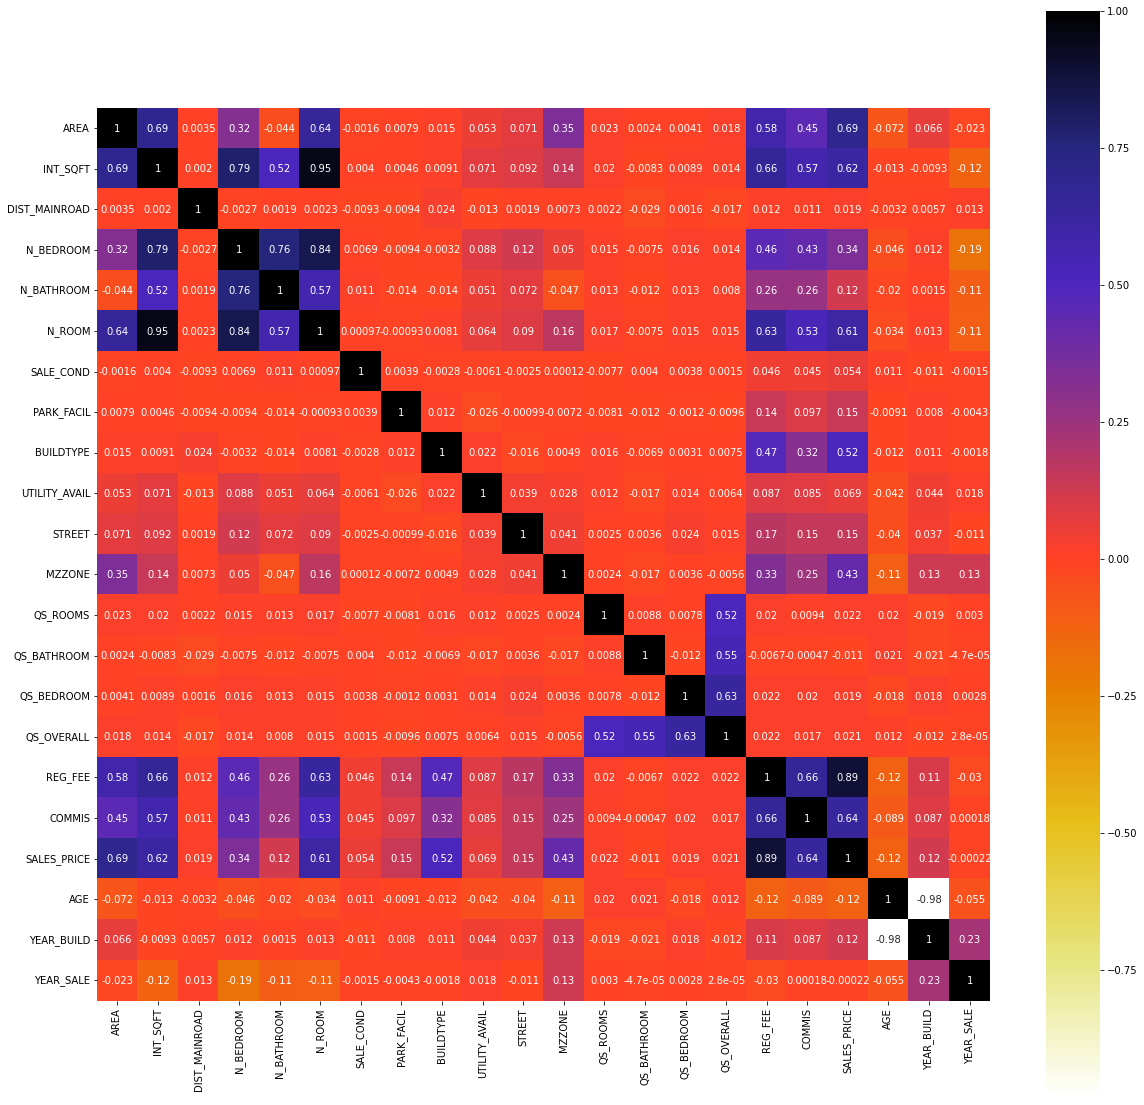

In [116]:
plt.figure(figsize=(20,20))
cor = df.corr()
sns.heatmap(cor,annot=True,square=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [117]:
df.drop(["PRT_ID","DIST_MAINROAD","DATE_SALE","DATE_BUILD","QS_ROOMS","QS_BATHROOM","QS_BEDROOM","QS_OVERALL","REG_FEE","COMMIS"],axis=1,inplace=True)

###Splitting Training and Testing Data

In [118]:
df.head(2)

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,YEAR_BUILD,YEAR_SALE
0,1,1004,1,1,3,3,1,3,3,2,1,8124400,43,1967,2011
1,6,1986,2,1,5,3,0,3,3,3,4,22781941,10,1995,2006


In [119]:
x=df[["AREA","INT_SQFT","N_BEDROOM","N_ROOM","SALE_COND","PARK_FACIL","BUILDTYPE","UTILITY_AVAIL","STREET","MZZONE","AGE"]]
y=df["SALES_PRICE"]

In [120]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=0)

##Machine Learning

**Linear Regression**

In [121]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
print("Linear Regression Score:",model.score(x_test,y_test)*100)

Linear Regression Score: 87.91624304223895


**Decision Tree**



In [122]:
from sklearn.tree import DecisionTreeRegressor
d_t = DecisionTreeRegressor()
d_t.fit(x_train,y_train)

y_pred = d_t.predict(x_test)
print("Decision Tree Score:",d_t.score(x_test,y_test)*100)

Decision Tree Score: 97.3869982723503


**Random Forest**

In [123]:
from sklearn.ensemble import RandomForestRegressor
#Fitting the model
r_f = RandomForestRegressor(max_depth=16,n_estimators=180,random_state=15)
r_f.fit(x_train,y_train)

ypred = r_f.predict(x_test)
r_f_score = r_f.score(x_test,y_test)*100
print("Random Forest Square is :",r_f_score)

Random Forest Square is : 98.9964875629683


**Gradient Boosting**

In [124]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score

#fitting the model
gradientboosting = GradientBoostingRegressor()
gradientboosting.fit(x_train,y_train)

#predicting the model
GradientBoosting_score = gradientboosting.score(x_test,y_test)*100
print("Gradient Boosting Score:",GradientBoosting_score)

Gradient Boosting Score: 99.21386840267603


**AdaBoost**

In [125]:
from sklearn.ensemble import AdaBoostRegressor
#fitting the model
adaboost = AdaBoostRegressor(random_state=15,n_estimators=130)
adaboost.fit(x_train,y_train)

#predicting the model
adaboost_score = adaboost.score(x_test,y_test)*100
print("AdaBoost Score:",adaboost_score)

AdaBoost Score: 93.57880828821466


In [126]:
feature_scores = pd.Series(r_f.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_scores=feature_scores*100
feature_scores

AREA             47.995203
BUILDTYPE        32.454872
INT_SQFT         11.390411
MZZONE            3.781445
PARK_FACIL        1.467494
STREET            1.094700
N_ROOM            0.718919
AGE               0.568376
SALE_COND         0.292649
UTILITY_AVAIL     0.118227
N_BEDROOM         0.117705
dtype: float64

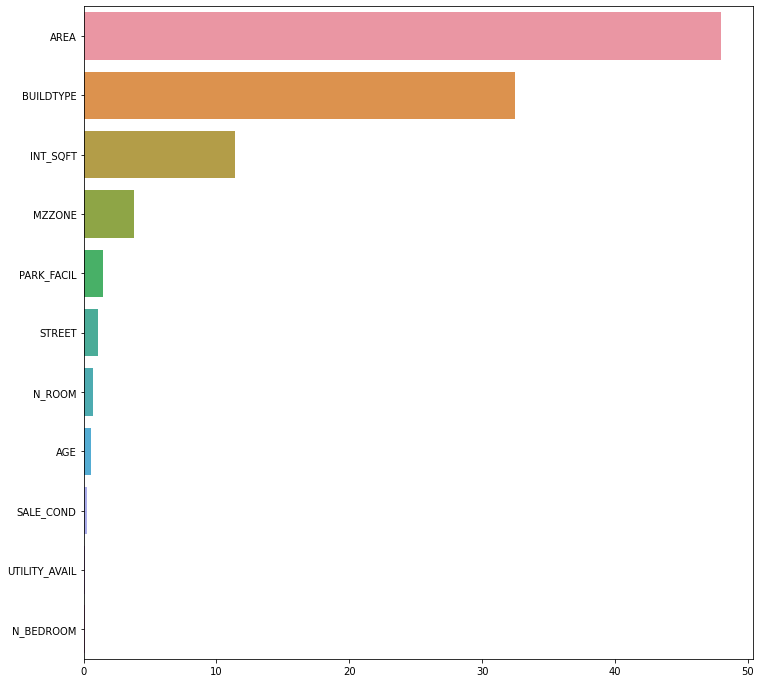

In [127]:
plt.figure(figsize=(12,12))
sns.barplot(x=feature_scores,y=feature_scores.index)
plt.show()


In [128]:
main_features = feature_scores.loc[feature_scores > 0]
main_features

AREA             47.995203
BUILDTYPE        32.454872
INT_SQFT         11.390411
MZZONE            3.781445
PARK_FACIL        1.467494
STREET            1.094700
N_ROOM            0.718919
AGE               0.568376
SALE_COND         0.292649
UTILITY_AVAIL     0.118227
N_BEDROOM         0.117705
dtype: float64

In [129]:
main_features = ['AREA','INT_SQFT','N_BEDROOM','PARK_FACIL','MZZONE','BUILDTYPE','STREET']

In [130]:
X=df[main_features]

In [131]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=15)

In [132]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score


GradientBoosting = GradientBoostingRegressor()
GradientBoosting.fit(x_train,y_train)


GradientBoosting_score = GradientBoosting.score(x_test,y_test)*100
GradientBoosting_score

98.6673443191776

In [133]:
GradientBoosting.predict([[1,1500,2,1,1,1,1]])

array([6037818.4060214])